In [2]:
import pandas as pd

data = pd.read_csv('cluster.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


In [3]:
data.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,1.513081,1.520776,1.498351
std,1.250841,1.247587,1.267040
min,-1.649121,-1.631006,-1.921651
25%,0.542161,0.561720,0.483172
50%,1.520402,1.526202,1.466841
75%,2.483222,2.505169,2.485410
max,4.497581,4.442727,4.678731


In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

features = data[data.columns[0:3]]
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:3]])

pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

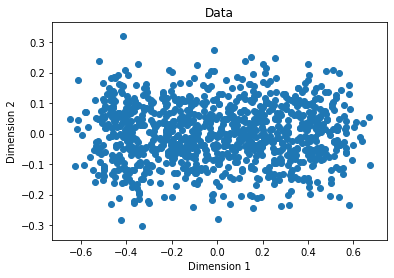

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

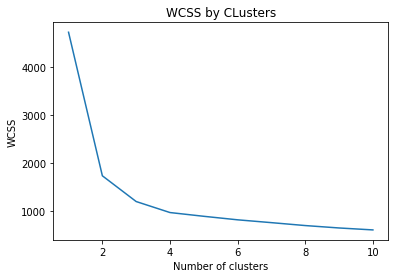

In [11]:
import numpy as np
from sklearn.cluster import KMeans


wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(features.values)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('WCSS by CLusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

When the number of clusters increases from 1 to 2, there is a large reduction in WCSS and then another smaller reduction from 2 to 3. This points to that there are 3 reasonably well spearetated clusters of data points. 

In [13]:
model = KMeans(n_clusters=3, init = 'k-means++', n_init=100,max_iter=1000)

km_clusters = model.fit_predict(features.values)

km_clusters

array([1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0,
       2, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 2,
       1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 0,
       2, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2,

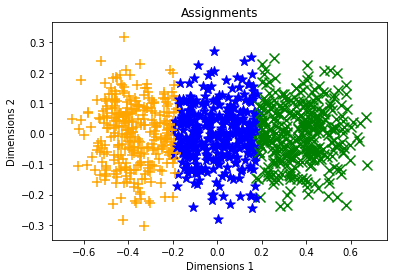

In [16]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1],color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimensions 1')
    plt.ylabel('Dimensions 2')
    plt.title('Assignments')
    plt.show()
    
plot_clusters(features_2d, km_clusters)